In [6]:
#pip install seaborn

  Using cached https://files.pythonhosted.org/packages/61/51/046cbc61c7607e5ecead6ff1a9453fba5e7e47a5ea8d608cc7036586a5ef/scipy-1.4.1-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [7]:
#merge data from several states
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import pprint
import seaborn as sns

In [3]:
alldogs_merged = pd.read_csv('./data/alldogs_merged.csv')
state_info = pd.read_csv('stats.csv')
state_pos = 0
current_state = state_info['state'][state_pos]
current_city = state_info['city'][state_pos]
current_state

'AL'

In [4]:
len(alldogs_merged)

265324

In [8]:
alldogs_merged.dtypes

id                              int64
organization_id                object
url                            object
age                            object
gender                         object
size                           object
coat                           object
tags                           object
name                           object
status                         object
status_changed_at              object
published_at                   object
distance                      float64
breeds.primary                 object
breeds.secondary               object
breeds.mixed                     bool
breeds.unknown                   bool
colors.primary                 object
colors.secondary               object
colors.tertiary                object
attributes.spayed_neutered       bool
attributes.house_trained         bool
attributes.declawed           float64
attributes.special_needs         bool
attributes.shots_current         bool
environment.children           object
environment.

In [9]:
alldogs_merged.head()

,id,organization_id,url,age,gender,size,coat,tags,name,status,...,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,contact.address.city,contact.address.state,contact.address.postcode,adoption_time
0,24113097,CA712,https://www.petfinder.com/dog/madonna-24113097...,Adult,Female,Small,Long,[],Madonna,adopted,...,NaN,False,True,False,NaN,NaN,Birmingham,AL,35201,20
1,35898350,CA712,https://www.petfinder.com/dog/bess-located-in-...,Adult,Female,Small,Short,[],"Bess (located in Birmingam, AL)",adopted,...,NaN,False,True,NaN,NaN,NaN,Birmingham,AL,35201,96
2,30542160,TX1860,https://www.petfinder.com/dog/madonna-30542160...,Young,Female,Small,Medium,[],Madonna,adopted,...,NaN,False,True,NaN,NaN,NaN,Birmingham,AL,35201,98
3,41000971,FL653,https://www.petfinder.com/dog/al-sweetie-birmi...,Adult,Female,Extra Large,Short,[],AL - Sweetie/Birmingham,adopted,...,NaN,False,True,True,True,True,Birmingham,AL,35201,32
4,33618001,FL653,https://www.petfinder.com/dog/al-rosie-prattvi...,Young,Female,Large,NaN,[],AL - Rosie/Prattville,adopted,...,NaN,False,True,NaN,NaN,NaN,Birmingham,AL,35201,16


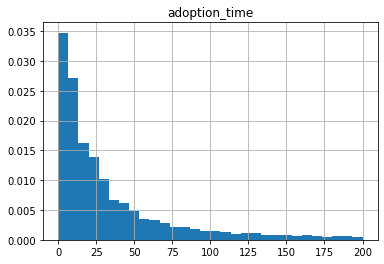

In [64]:
hist = alldogs_merged.hist(column='adoption_time', bins = 30, range=[0,200], density=True)

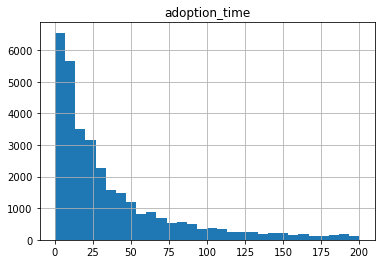

In [15]:
hist = alldogs_merged[alldogs_merged['contact.address.state'] == 'AL'].hist(column='adoption_time', bins = 30, range=[0,200])

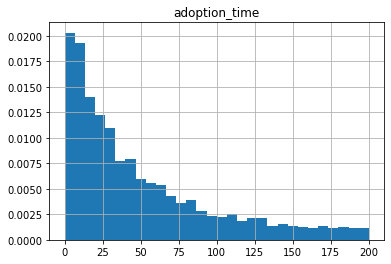

In [65]:
hist = alldogs_merged[alldogs_merged['age'] == 'Senior'].hist(column='adoption_time', bins = 30, range=[0,200], density = True)

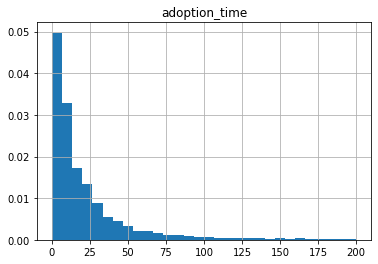

In [66]:
hist = alldogs_merged[alldogs_merged['age'] == 'Baby'].hist(column='adoption_time', bins = 30, range=[0,200], density = True)

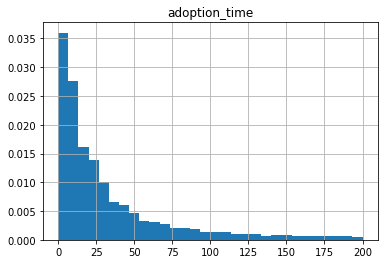

In [67]:
hist = alldogs_merged[alldogs_merged['size'] == 'Small'].hist(column='adoption_time', bins = 30, range=[0,200], density = True)

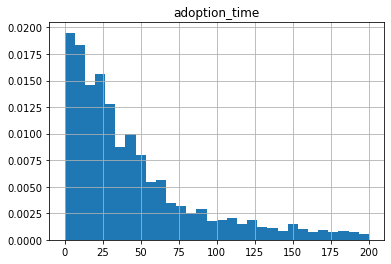

In [68]:
hist = alldogs_merged[alldogs_merged['size'] == 'Extra Large'].hist(column='adoption_time', bins = 30, range=[0,200], density = True)

In [60]:
mean_adpt_time = {}
#create a dict with each state and average adoption time
for i in range(0,7):
    key = state_info.iloc[i]['state']
    val = alldogs_merged[alldogs_merged['contact.address.state'] == state_info.iloc[i]['state']]['adoption_time'].mean()
    mean_adpt_time[key] = val
pprint(mean_adpt_time)

{'AK': 126.14481762369087,
 'AL': 170.06322266376105,
 'AR': 125.39647538080057,
 'AZ': 139.03937021048756,
 'CA': 184.01237496363595,
 'CO': 84.86054070545164,
 'CT': 167.97148171109734}


In [38]:
state_info.iloc[i]['state']

'CO'

In [54]:
{key: value for key, value in sorted(mean_adpt_time.items(), key=lambda item: item[1])}

{'CO': 84.86054070545164,
 'AR': 125.39647538080057,
 'AK': 126.14481762369087,
 'AZ': 139.03937021048756,
 'CT': 167.97148171109734,
 'AL': 170.06322266376105,
 'CA': 184.01237496363595}

In [61]:
var_adpt_time = {}
#create a dict with each state and average adoption time
for i in range(0,7):
    key = state_info.iloc[i]['state']
    val = alldogs_merged[alldogs_merged['contact.address.state'] == state_info.iloc[i]['state']]['adoption_time'].std()
    var_adpt_time[key] = val
pprint(var_adpt_time)

{'AK': 289.8858847932409,
 'AL': 394.31090881863236,
 'AR': 289.66755555383185,
 'AZ': 321.2568032682665,
 'CA': 407.849730568399,
 'CO': 229.02571736712306,
 'CT': 369.2792895560888}


In [59]:
alldogs_merged[alldogs_merged['contact.address.state'] == state_info.iloc[i]['state']]['adoption_time'].var()

136367.1936950497

In [14]:
# Check for any missing data
print("Table size -", end=' ')
print(alldogs_merged.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_merged.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_merged.columns
                     if alldogs_merged[col].isnull().any()]

Table size - (265324, 32)
Checking for missing values..
coat                    113765
name                        57
breeds.secondary        169752
colors.primary          101161
colors.secondary        182830
colors.tertiary         263287
attributes.declawed     265324
environment.children    214990
environment.dogs        212236
environment.cats        238603
dtype: int64


In [30]:
type(missing_cols)

list

In [90]:
alldogs_nm = alldogs_merged.drop(missing_cols, axis=1)

In [91]:
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,status,status_changed_at,published_at,...,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.city,contact.address.state,contact.address.postcode,adoption_time
0,24113097,CA712,https://www.petfinder.com/dog/madonna-24113097...,Adult,Female,Small,[],adopted,2012-10-04T11:36:05+0000,2012-09-13T12:51:33+0000,...,False,False,True,True,False,True,Birmingham,AL,35201,20
1,35898350,CA712,https://www.petfinder.com/dog/bess-located-in-...,Adult,Female,Small,[],adopted,2016-11-13T08:14:08+0000,2016-08-08T19:15:43+0000,...,False,False,True,True,False,True,Birmingham,AL,35201,96
2,30542160,TX1860,https://www.petfinder.com/dog/madonna-30542160...,Young,Female,Small,[],adopted,2015-01-20T17:31:49+0000,2014-10-14T09:20:08+0000,...,True,False,True,True,False,True,Birmingham,AL,35201,98
3,41000971,FL653,https://www.petfinder.com/dog/al-sweetie-birmi...,Adult,Female,Extra Large,[],adopted,2018-03-25T13:18:45+0000,2018-02-21T00:02:35+0000,...,False,False,True,True,False,True,Birmingham,AL,35201,32
4,33618001,FL653,https://www.petfinder.com/dog/al-rosie-prattvi...,Young,Female,Large,[],adopted,2015-11-11T18:28:03+0000,2015-10-26T11:05:40+0000,...,False,False,True,True,False,True,Birmingham,AL,35201,16


In [104]:
#remove negative days error
alldogs_nm = alldogs_nm[alldogs_nm['adoption_time']>=0]

In [105]:
alldogs_nm.columns

Index(['id', 'organization_id', 'url', 'age', 'gender', 'size', 'tags',
       'status', 'status_changed_at', 'published_at', 'distance',
       'breeds.primary', 'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current',
       'contact.address.city', 'contact.address.state',
       'contact.address.postcode', 'adoption_time'],
      dtype='object')

In [106]:
X_features = ['age', 'gender', 'size',
       'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current', 'contact.address.state']
X = alldogs_nm[X_features]
X.head()

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
0,Adult,Female,Small,False,False,True,True,False,True,AL
1,Adult,Female,Small,False,False,True,True,False,True,AL
2,Young,Female,Small,True,False,True,True,False,True,AL
3,Adult,Female,Extra Large,False,False,True,True,False,True,AL
4,Young,Female,Large,False,False,True,True,False,True,AL


In [107]:
X.dtypes

age                           object
gender                        object
size                          object
breeds.mixed                    bool
breeds.unknown                  bool
attributes.spayed_neutered      bool
attributes.house_trained        bool
attributes.special_needs        bool
attributes.shots_current        bool
contact.address.state         object
dtype: object

In [108]:
X['age'].value_counts()

Young     92229
Baby      79792
Adult     79719
Senior     9032
Name: age, dtype: int64

In [109]:
X['gender'].value_counts()

Male       132636
Female     127794
Unknown       342
Name: gender, dtype: int64

In [110]:
X['size'].value_counts()

Medium         107000
Small           77521
Large           68398
Extra Large      7853
Name: size, dtype: int64

In [111]:
X['contact.address.state'].value_counts()

CO    83703
AZ    58948
CA    43852
AL    38311
AR    22113
CT    11118
AK     2727
Name: contact.address.state, dtype: int64

In [112]:
test = alldogs_merged['name'].value_counts()
test[test>10]

Daisy        931
Bella        896
Buddy        825
Charlie      802
Lucy         751
            ... 
Gordie        11
Jodie         11
Brother       11
Suzette       11
Annabella     11
Name: name, Length: 3343, dtype: int64

In [113]:
type(test)

pandas.core.series.Series

In [114]:
test.to_csv('names.csv', header=False, index=True)

In [115]:
X

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
0,Adult,Female,Small,False,False,True,True,False,True,AL
1,Adult,Female,Small,False,False,True,True,False,True,AL
2,Young,Female,Small,True,False,True,True,False,True,AL
3,Adult,Female,Extra Large,False,False,True,True,False,True,AL
4,Young,Female,Large,False,False,True,True,False,True,AL
...,...,...,...,...,...,...,...,...,...,...
265319,Young,Female,Large,False,False,True,True,False,True,CT
265320,Young,Male,Medium,True,False,True,True,False,True,CT
265321,Baby,Female,Medium,True,False,True,True,False,True,CT
265322,Young,Female,Large,True,False,True,True,False,True,CT


In [116]:
y = alldogs_nm['adoption_time']
type(y)

pandas.core.series.Series

In [117]:
cat_col = ['age','gender','size','contact.address.state']

In [118]:
X[cat_col]=X[cat_col].astype('category')

C:\anaconda_python\envs\Insight\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [119]:
X.dtypes

age                           category
gender                        category
size                          category
breeds.mixed                      bool
breeds.unknown                    bool
attributes.spayed_neutered        bool
attributes.house_trained          bool
attributes.special_needs          bool
attributes.shots_current          bool
contact.address.state         category
dtype: object

In [120]:
total = pd.concat([X,y], axis=1)
total.dtypes

age                           category
gender                        category
size                          category
breeds.mixed                      bool
breeds.unknown                    bool
attributes.spayed_neutered        bool
attributes.house_trained          bool
attributes.special_needs          bool
attributes.shots_current          bool
contact.address.state         category
adoption_time                    int64
dtype: object

In [121]:
total

,age,gender,size,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,adoption_time
0,Adult,Female,Small,False,False,True,True,False,True,AL,20
1,Adult,Female,Small,False,False,True,True,False,True,AL,96
2,Young,Female,Small,True,False,True,True,False,True,AL,98
3,Adult,Female,Extra Large,False,False,True,True,False,True,AL,32
4,Young,Female,Large,False,False,True,True,False,True,AL,16
...,...,...,...,...,...,...,...,...,...,...,...
265319,Young,Female,Large,False,False,True,True,False,True,CT,30
265320,Young,Male,Medium,True,False,True,True,False,True,CT,100
265321,Baby,Female,Medium,True,False,True,True,False,True,CT,20
265322,Young,Female,Large,True,False,True,True,False,True,CT,55


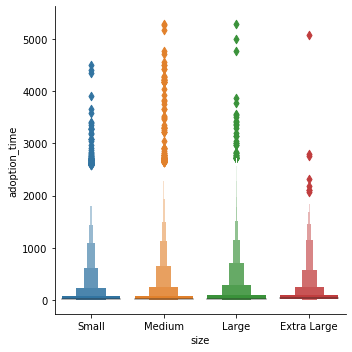

In [135]:
sizeplot = sns.catplot(x='size', y='adoption_time', order=["Small", "Medium", "Large", "Extra Large"] , data=total, kind='boxen');

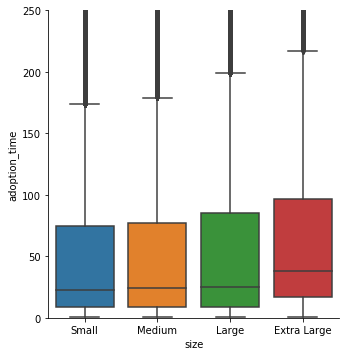

In [139]:
sizeplot2 = sns.catplot(x='size', y='adoption_time', order=["Small", "Medium", "Large", "Extra Large"] , data=total, kind='box');
sizeplot2.set(ylim=(0,250))

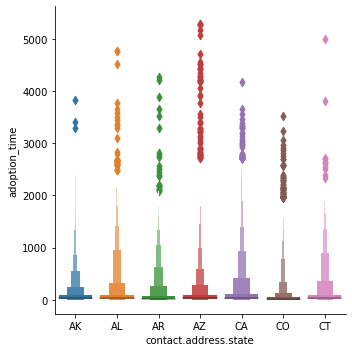

In [124]:
sns.catplot(x='contact.address.state', y='adoption_time', kind="boxen", data=total);

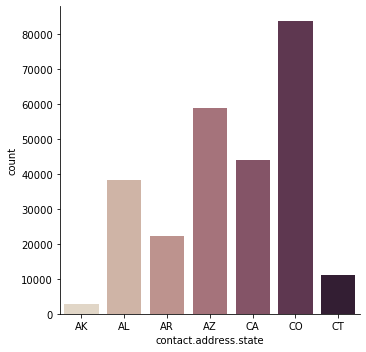

In [125]:
sns.catplot(x="contact.address.state", kind="count", palette="ch:.25", data=total);

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 0)
print('Training set size = {} and Test set size = {}'.format(len(train_X),len(test_X)))